In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math

In [3]:
def hodgkinhuxley(state,t):
    v = state[0]
    y = state[1]
    m = state[2]
    h = state[3]
    
    # Channel Gating Kinetics for Potassium (K) channel n
    # n is the activation variable for the Potassium (K) Channel
    # Potassium channel does not inactivate, so there is no inactivation variable
    a_n = 0.01*(10-v)/(np.exp((10-v)/10)-1)
    b_n = 0.125*np.exp(-v/80)
    
    # Channel Gating Kinetics for Sodium (Na) Channel m
    # m is the activation variable for the Sodium (Na) Channel
    a_m = 0.1*(25-v)/(np.exp((25-v)/10)-1)
    b_m = 4*np.exp(-v/18)
    
    # Channel Gating Kinetics for Sodium (Na) Channel h
    # h is the inactivation variable for the Sodium (Na) Channel
    b_h = 1/(np.exp((30-v)/10)+1)    #should be +1?
    a_h = 0.07*np.exp(-v/20)
    
    # Channel reversal potentials
    V_Na = 115
    V_K = -12
    V_L = 10.6
    
    # Sodium maximum channel conductance
    gbar_Na = 120
    g_Na = gbar_Na * h * m**3
    
    # Potassium maximum channel conductance
    gbar_K = 36
    g_K = gbar_K * (y**4)
    
    # Leakage channel conductance
    gbar_L = 0.3
    
    # Membrane capacitance
    C_m = 1
    
    #gbar_K = 24
    #gbar_Na = 74
    
    # Channel currents
    I_Na = g_Na * (v-V_Na)
    I_K = g_K * (v-V_K)
    I_L = gbar_L
    I_app = 6.2
    
    # Differential equations
    dvdt = (-I_Na - I_K - I_L + I_app)/C_m
    dndt = a_n*(1-y) - b_n*y
    dmdt = a_m*(1-m) - b_m*m
    dhdt = a_h*(1-h) - b_h*h
    return dvdt, dndt, dmdt, dhdt

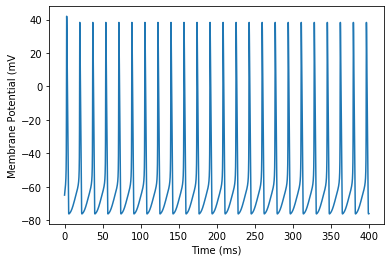

In [6]:
t = np.arange (0,400,.001)
state0 = [0, 0.28, 0.05, 0.6]
state = odeint(hodgkinhuxley, state0, t)
plt.plot(t,state[:,0]-65)
pyplot.xlabel('Time (ms)')
pyplot.ylabel('Membrane Potential (mV')
plt.show()

C:\Users\hudso\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


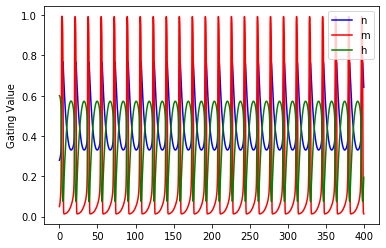

In [7]:
# Plot gating variables
# t = np.arange(0,20,.001)
plt.plot(t, state[:,1], 'b', label='n') # activation variable for K channel (n): blue
plt.plot(t, state[:,2], 'r', label='m') # activation variable for Na channel (m): red
plt.plot(t, state[:,3], 'g', label='h') # inactivation variable for Na channel (h): green
plt.ylabel('Gating Value')
plt.legend()

In [42]:
'''
Channel reversal potentials
V_Na from 115 to 55: two spikes in 30 ms time span to 1; still enough repolarization and ending potential at ~-65mV
V_K from -12 to -72: almost like a damped sine waveform; first repolarizes then follows in pattern and amplitude decreases
V_L from 10.6 to -60: no change

Sodium maximum channel conductance
gbar_Na from 120 to 0.4: severe decrease in change in membrane potential (~4mV); still looks like an action potential with sufficient depolarization and repolarization
g_Na is function of gbar_Na, h, and m

Potassium maximum channel conductance
gbar_K from 36 to 0.37: regular change in membrane potential; suddent change at peak; doesn't repolarize enough - ends at 0mV
g_K is function of gbar_K and y

Leakage channel conductance
gbar_L from 0.3 to 0.0328: no change

Membrane capacitance
C_m from 1 to 0.77: no change

Channel currents
I_Na is function of g_Na, v, V_Na
I_K is function of g_K, v, V_K
I_L is function of g_L
I_app from 6.2 to 10: no change
'''

"\nChannel reversal potentials\nV_Na from 115 to 55: two spikes in 30 ms time span to 1; still enough repolarization and ending potential at ~-65mV\nV_K from -12 to -72: almost like a damped sine waveform; first repolarizes then follows in pattern and amplitude decreases\nV_L from 10.6 to -60: no change\n\nSodium maximum channel conductance\ngbar_Na from 120 to 0.4: severe decrease in change in membrane potential (~4mV); still looks like an action potential with sufficient depolarization and repolarization\ng_Na is function of gbar_Na, h, and m\n\nPotassium maximum channel conductance\ngbar_K from 36 to 0.37: regular change in membrane potential; suddent change at peak; doesn't repolarize enough - ends at 0mV\ng_K is function of gbar_K and y\n\nLeakage channel conductance\ngbar_L from 0.3 to 0.0328: no change\n\nMembrane capacitance\nC_m from 1 to 0.77: no change\n\nChannel currents\nI_Na is function of g_Na, v, V_Na\nI_K is function of g_K, v, V_K\nI_L is function of g_L\nI_app from 6